# Quantum State Tomography - Ng Chun Seng

## Definition

Quantum State Tomography (QST), by its name suggests a procedure/method for reconstruction of quantum states, as per definition of tomography, i.e.: imaging via slicing.

For completeness, QST shall be defined as process of reconstructing quantum states via measurements on ensemble of identical quantum states.[1][2]

## Motivation

More often than not, or rather for usefulness, we may often have an unknown arbitrary quantum state $\hat{\rho}$ of particular interest. In other words, we want to know/reconstruct $\hat{\rho}$.

To distinguish QST with quantum measurement on a particular system, QST determines the state of the quantum system prior to quantum measurement;
while quantum measurement alters the quantum state of the particular quantum system, via system collapsing into a specific post-measurement state thus determining a post-measurement state. [2]

For Single-Qubit State Tomography, we refer to Ref.[3], which has been implemented and demonstrated in one of the homework problems found [here](https://github.com/dexonoir/portfolio/blob/main/Quantum%20Process%20Tomography%20and%20QST%20problems%20-%20Ng%20Chun%20Seng.ipynb).

Essentially, Single-Qubit State Tomography reconstructs

$$\hat{\rho} = \frac{1}{2} \left(\text{Tr}(\hat{\rho})\hat{\mathbb{I}} + \text{Tr}(\hat{\rho}\hat{\sigma_x})\hat{\sigma}_x + \text{Tr}(\hat{\rho}\hat{\sigma_y})\hat{\sigma}_y + \text{Tr}(\hat{\rho}\hat{\sigma_z})\hat{\sigma}_z\right)$$

## Multi-Qubit State Tomography

Let's converge our topic of discussion to Multi-Qubit State Tomography, which shall make things more interesting.

To stay concise and precise, we aim to reconstruct [3]
$$\hat{\rho} = \frac{1}{2^n}\sum\limits_{v_1,...,v_n=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n} $$

which is a rewritten form in terms of single-qubit basis $\in \frac{1}{\sqrt{2}}\{\mathbb{I},\hat{\sigma}_x,\hat{\sigma}_y,\hat{\sigma}_z\}$ of the more general $n$-qubits system.

<!-- $$\hat{\rho} = \eta_1 \otimes \dots \otimes \eta_n$$ -->

<!-- where $\eta$ = density matrix of single qubit. -->

For this project, we shall look at 3-qubits GHZ State Tomography, which is the reconstruction of 

$$\hat{\rho}_{GHZ} = \frac{1}{2}(|000\rangle + |111\rangle)(\langle000| + \langle111|) = \frac{1}{2}(|000\rangle\langle000| + |000\rangle\langle111| +  |111\rangle\langle000| +  |111\rangle\langle111|)$$
$$\hat{\rho}_{GHZ} = \begin{pmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{pmatrix}$$

which is indeed an entangled 3-qubits system.

## GHZ State Tomography

To demonstrate Multi-Qubit QST, let's first initialize the dependencies via Qiskit AER simulator and Qiskit IBM Runtime packages

In [1]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

We prepare our GHZ state via

In [2]:
import qiskit

# GHZ State preparation circuit
qc_ghz = qiskit.QuantumCircuit(3)
qc_ghz.h(0)
for i in range(1, 3):
    qc_ghz.cx(0, i)

print(qc_ghz)

     ┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘


Next, we perform the QST Experiment on our prepared GHZ state and analyze the reconstructed density matrix as one of the outputs of the experiment

,name,experiment,components,value,quality,backend,run_time,trace,eigvals,raw_eigvals,rescaled_psd,fitter_metadata,conditional_probability,positive
f8f61d64,state,StateTomography,"[Q0, Q1, Q2]",DensityMatrix([[ 4.56678595e-01+0.00000000e+00...,None,aer_simulator_from(fake_perth),None,1.0,"[0.8459186842939899, 0.062352518241991985, 0.0...","[0.8484819642939186, 0.0649157982419208, 0.042...",True,"{'fitter': 'linear_inversion', 'fitter_time': ...",1.0,True
fb7445fe,state_fidelity,StateTomography,"[Q0, Q1, Q2]",0.845258,None,aer_simulator_from(fake_perth),None,None,None,None,None,None,None,None
ca6bb527,positive,StateTomography,"[Q0, Q1, Q2]",True,None,aer_simulator_from(fake_perth),None,None,None,None,None,None,None,None


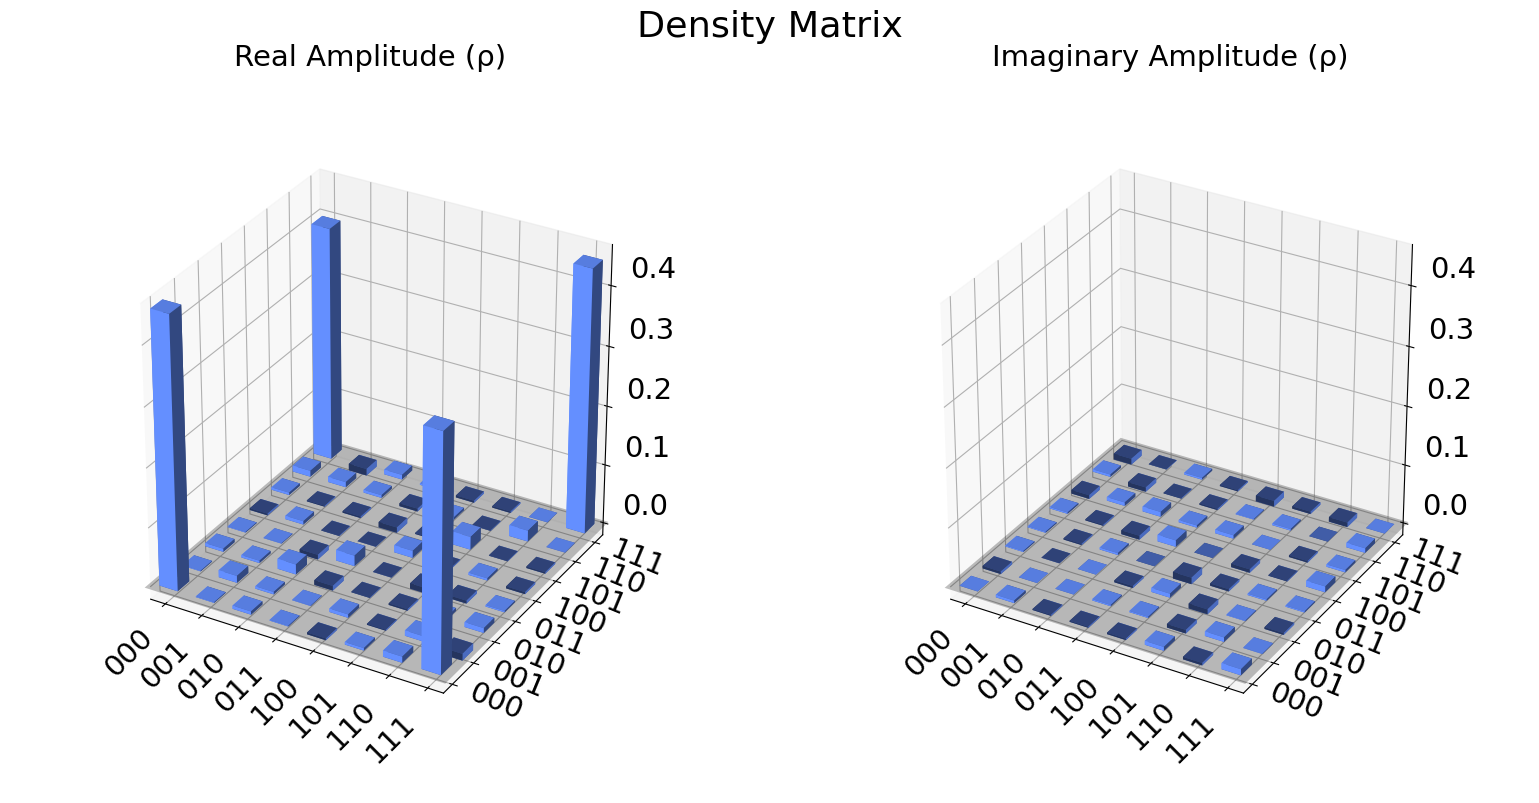

In [3]:
from qiskit_experiments.library import StateTomography
from qiskit.visualization import plot_histogram,plot_state_city

# QST Experiment
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend, seed_simulation=88).block_for_results()

display(qstdata1.analysis_results(dataframe=True))
density_matrix = qstdata1.analysis_results("state", dataframe=True).iloc[0].value.data    #Reconstructed Density Matrix 

#Visualization
state = qstdata1.analysis_results("state", dataframe=True).iloc[0].value
plot_state_city(state, title='Density Matrix')

Fidelity of QST Experiment via Qiskit on Qiskit AerSimulator backend is calculated to be $\approx 84\%$ which is considerably high, although 90\%+ fidelity shall be preferred, i.e.: higher accuracy of QST reconstruction.

In [4]:
fid_result = qstdata1.analysis_results("state_fidelity", dataframe=True).iloc[0]
print("State Fidelity = {:.5f}".format(fid_result.value))

State Fidelity = 0.84526


## GHZ State Tomography (Single-Qubit Inspired)

To uncover the actual experiment procedure for Multi-Qubits State Tomography, here, I propose a QST procedure for Multi-Qubits State Tomography. 
<!-- , which is inspired from Single-Qubit State Tomography, i.e. Direct Inversion and Maximum-Likelihood Estimation.-->

For the reconstruction of Single-Qubit State Tomography, since single-qubit (2-dimensional) density matrix can be rewritten in terms of Bloch vectors $\overrightarrow{v}$:
$$\hat{\rho} = \frac{1}{2}(\mathbb{I}+\sum\limits_{i=x,y,z=1,2,3}v_i\sigma_i) = \frac{1}{2}(\mathbb{I}+\overrightarrow{v}\cdot\overrightarrow{\sigma})$$

It is sufficient to reconstruct $\overrightarrow{v}$ to reconstruct $\hat{\rho}$.

For Multi-Qubits, as per 
$$\hat{\rho} = \frac{1}{2^n}\sum\limits_{v_1,...,v_n=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n} $$
<!-- $$\hat{\rho} = \eta_1 \otimes \dots \otimes \eta_n$$ -->

above, we estimate expectation value $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n}\rangle = \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})$ via measurements on individual qubits.

For GHZ State Tomography case, we have dimension $d = 2^n = 2^3 = 8$ thus 

$$\hat{\rho} = \frac{1}{2^n}\sum\limits_{v_1,v_2,v_3=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \otimes \hat{\sigma}_{v_3} $$
<!-- $$\hat{\rho} = \eta_1 \otimes \eta_2 \otimes \eta_3$$ -->

Note that $\text{Tr}(\hat{\rho}\hat{\sigma}_{0}) = \text{Tr}(\hat{\rho}\hat{\mathbb{I}}) = 1$. Thus, we have Eq.($\ast$):
$$\text{Tr}(\hat{\rho}\hat{\sigma}_{0}\otimes\hat{\sigma}_{0}\otimes \hat{\sigma}_{0})\hat{\sigma}_{0}\otimes\hat{\sigma}_{0}\otimes \otimes \hat{\sigma}_{0} = \text{Tr}(\hat{\rho}\hat{\mathbb{I}}\otimes\hat{\mathbb{I}}\otimes \hat{\mathbb{I}})\hat{\mathbb{I}}\otimes\hat{\mathbb{I}} \otimes \hat{\mathbb{I}} =1  \tag{$\ast$}$$


## Procedure

Let's first set up a GHZ state (which shall be an unknown state for QST) :

In [5]:
qr = qiskit.QuantumRegister(3)
cr0 = qiskit.ClassicalRegister(1)
cr1 = qiskit.ClassicalRegister(1)
cr2 = qiskit.ClassicalRegister(1)
qc_ghz = qiskit.QuantumCircuit(qr,cr0,cr1,cr2)
qc_ghz.h(0)
for i in range(1, 3):
    qc_ghz.cx(0, i)
qc_ghz.barrier(range(3))

print(qc_ghz)

      ┌───┐           ░ 
q0_0: ┤ H ├──■────■───░─
      └───┘┌─┴─┐  │   ░ 
q0_1: ─────┤ X ├──┼───░─
           └───┘┌─┴─┐ ░ 
q0_2: ──────────┤ X ├─░─
                └───┘ ░ 
c0: 1/══════════════════
                        
c1: 1/══════════════════
                        
c2: 1/══════════════════
                        


For measurement in every pauli-basis $\sigma_i$ except $\sigma_0 = \mathbb{I}$ : 

In [6]:
def measurement(circuit,pauli_i,qubit,**setup):
    if pauli_i < 0 or pauli_i > 3:
        raise KeyError("i index out of bound for pauli operators")
    if pauli_i == 0:
        pass
    if pauli_i == 1:                         #sigma_x
        circuit.h(qubit)
        circuit.measure(qubit,qubit)
    if pauli_i == 2:                         #sigma_y
        circuit.sdg(qubit)
        circuit.h(qubit)
        circuit.measure(qubit,qubit)
    if pauli_i == 3:                         #sigma_z
        circuit.measure(qubit,qubit)
    show_setup = setup.get("setup", None)
    if show_setup == True:               #show setup
        print(circuit)

#Measurement of pauli-x on first qubit:
measurement(qc_ghz.copy(),1,0,setup=True)

      ┌───┐           ░ ┌───┐┌─┐
q0_0: ┤ H ├──■────■───░─┤ H ├┤M├
      └───┘┌─┴─┐  │   ░ └───┘└╥┘
q0_1: ─────┤ X ├──┼───░───────╫─
           └───┘┌─┴─┐ ░       ║ 
q0_2: ──────────┤ X ├─░───────╫─
                └───┘ ░       ║ 
c0: 1/════════════════════════╩═
                              0 
c1: 1/══════════════════════════
                                
c2: 1/══════════════════════════
                                


In [7]:
#Measurement of pauli-y on third qubit:
measurement(qc_ghz.copy(),2,2,setup=True)

      ┌───┐           ░                
q0_0: ┤ H ├──■────■───░────────────────
      └───┘┌─┴─┐  │   ░                
q0_1: ─────┤ X ├──┼───░────────────────
           └───┘┌─┴─┐ ░ ┌─────┐┌───┐┌─┐
q0_2: ──────────┤ X ├─░─┤ Sdg ├┤ H ├┤M├
                └───┘ ░ └─────┘└───┘└╥┘
c0: 1/═══════════════════════════════╬═
                                     ║ 
c1: 1/═══════════════════════════════╬═
                                     ║ 
c2: 1/═══════════════════════════════╩═
                                     0 


Note that for eigenvalue of $\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}$ we have product of eigenvalues from individual pauli-measurements.

Thus, we have average coefficients $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}\rangle$ estimated as $\langle\hat{\sigma}_{v_1}\rangle\otimes\langle\hat{\sigma}_{v_2}\rangle\otimes \hat\langle{\sigma}_{v_3}\rangle$
$$ \frac{N^{v_1,v_2,v_3}_{+++}-N^{v_1,v_2,v_3}_{++-}-N^{v_1,v_2,v_3}_{+-+}+N^{v_1,v_2,v_3}_{+--}-N^{v_1,v_2,v_3}_{-++}+N^{v_1,v_2,v_3}_{-+-}+N^{v_1,v_2,v_3}_{--+}-N^{v_1,v_2,v_3}_{---}}{N^{v_1}_{+}+N^{v_1}_{-}+N^{v_2}_{+}+N^{v_2}_{-}+N^{v_3}_{+}+N^{v_3}_{-}} $$

Thus, we perform measurements over all combinations of $\text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})$:

In [8]:
#Set up AerSimulator
aer = AerSimulator()

data = {}

for i in range(4):                          #total of 64 combinations
    for j in range(4):
        for k in range(4):
            if i == j == k == 0:
                continue
            qc_ghz = qiskit.QuantumCircuit(qr,cr0,cr1,cr2)
            qc_ghz.h(0)
            for z in range(1, 3):
                qc_ghz.cx(0, z)
            qc_ghz.barrier(range(3))
            measurement(qc_ghz,pauli_i=i,qubit=0)
            measurement(qc_ghz,pauli_i=j,qubit=1)
            measurement(qc_ghz,pauli_i=k,qubit=2)
            qstmeasdata = aer.run(qc_ghz,shots=1000,memory=True).result()
            data.update({f"{i},{j},{k}":qstmeasdata.get_counts()})

print(data)

def average_coefficients(i,j,k):
    index = [i,j,k]                        
    dataset = data[f"{i},{j},{k}"]
    coefficient = 0
    # print(dataset)   #to inspect the dataset for specific (i,j,k) combination of pauli-measurement
    
    keys_ = []                                      #keys without whitespace 
    for keys,values in dataset.items():                 
        keys_.append(keys.replace(" ",""))
    
    for number in range(len(list(dataset.keys()))):              #+1 or -1 coefficient
        number_of_1_states = 0
        for i in range(len(keys_[number])):
            if int(keys_[number][i]) == 1 :
                number_of_1_states += 1        
        if number_of_1_states % 2 == 0 or number_of_1_states == 0:             #even number of 1 -> +1 eigenvalue
            coefficient += list(dataset.values())[number]
        else:                                                                  #odd number of 1 -> -1 eigenvalue
            coefficient -= list(dataset.values())[number]       

    return coefficient/1000

{'0,0,1': {'0 0 0': 500, '1 0 0': 500}, '0,0,2': {'1 0 0': 528, '0 0 0': 472}, '0,0,3': {'0 0 0': 506, '1 0 0': 494}, '0,1,0': {'0 0 0': 508, '0 1 0': 492}, '0,1,1': {'1 1 0': 253, '1 0 0': 257, '0 0 0': 245, '0 1 0': 245}, '0,1,2': {'1 0 0': 252, '1 1 0': 260, '0 0 0': 258, '0 1 0': 230}, '0,1,3': {'0 1 0': 249, '0 0 0': 228, '1 1 0': 266, '1 0 0': 257}, '0,2,0': {'0 0 0': 493, '0 1 0': 507}, '0,2,1': {'1 0 0': 222, '1 1 0': 259, '0 1 0': 255, '0 0 0': 264}, '0,2,2': {'1 0 0': 250, '0 1 0': 273, '1 1 0': 244, '0 0 0': 233}, '0,2,3': {'0 0 0': 265, '1 0 0': 249, '1 1 0': 253, '0 1 0': 233}, '0,3,0': {'0 1 0': 517, '0 0 0': 483}, '0,3,1': {'0 1 0': 259, '1 0 0': 237, '0 0 0': 275, '1 1 0': 229}, '0,3,2': {'0 0 0': 257, '1 0 0': 246, '0 1 0': 261, '1 1 0': 236}, '0,3,3': {'0 0 0': 472, '1 1 0': 528}, '1,0,0': {'0 0 0': 508, '0 0 1': 492}, '1,0,1': {'1 0 0': 248, '0 0 0': 267, '0 0 1': 237, '1 0 1': 248}, '1,0,2': {'0 0 0': 258, '0 0 1': 247, '1 0 0': 264, '1 0 1': 231}, '1,0,3': {'1 0 1'

We thus reconstruct $\hat{\rho}_{QST}$ accordingly:
$$\hat{\rho}_{QST} = \frac{1}{2^n}\sum\limits_{v_1,v_2,v_3=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \otimes \hat{\sigma}_{v_3} $$

In [9]:
from qutip import qeye, sigmax,sigmay,sigmaz
import numpy as np

def pauli(m):
    if m == 0:
        return qeye(2).full()
    if m == 1:
        return sigmax().full()
    if m == 2:
        return sigmay().full()
    if m == 3:
        return sigmaz().full()
    else: raise ValueError("Invalid operator")


density_matrix = 1/8*qeye(8).full()             #Eq.(8), i.e.: our first term of density matrix
for i in range(4):                          #total of 64 combinations
    for j in range(4):
        for k in range(4):
            if i == j == k == 0:
                continue
            density_matrix += average_coefficients(i,j,k)*1/(2**3)*(np.kron(np.kron(pauli(i), pauli(j)), pauli(k)))

print(density_matrix)

[[ 4.960e-01+0.j       3.000e-03+0.0055j   2.000e-03+0.0005j
   1.950e-02-0.00875j  4.000e-03+0.00225j -3.000e-03-0.0045j
   3.750e-03-0.0035j   5.000e-01+0.00525j]
 [ 3.000e-03-0.0055j  -5.000e-04+0.j      -8.500e-03-0.00025j
  -4.000e-03+0.015j    1.000e-02+0.0035j   3.500e-03+0.00725j
   0.000e+00-0.00575j -1.375e-02-0.0015j ]
 [ 2.000e-03-0.0005j  -8.500e-03+0.00025j  1.100e-02+0.j
  -7.000e-03+0.006j   -3.750e-03+0.0035j   0.000e+00+0.00475j
   1.500e-03+0.00125j  5.000e-03+0.023j  ]
 [ 1.950e-02+0.00875j -4.000e-03-0.015j   -7.000e-03-0.006j
   1.500e-03+0.j       0.000e+00+0.00775j -1.025e-02+0.0095j
   3.000e-03+0.004j   -1.000e-03-0.00675j]
 [ 4.000e-03-0.00225j  1.000e-02-0.0035j  -3.750e-03-0.0035j
   0.000e+00-0.00775j -1.500e-03+0.j      -1.000e-03+0.012j
  -1.000e-03-0.006j   -9.000e-03-0.01175j]
 [-3.000e-03+0.0045j   3.500e-03-0.00725j  0.000e+00-0.00475j
  -1.025e-02-0.0095j  -1.000e-03-0.012j   -1.100e-02+0.j
  -4.000e-03-0.00225j  1.100e-02-0.0025j ]
 [ 3.750e-03+0.0

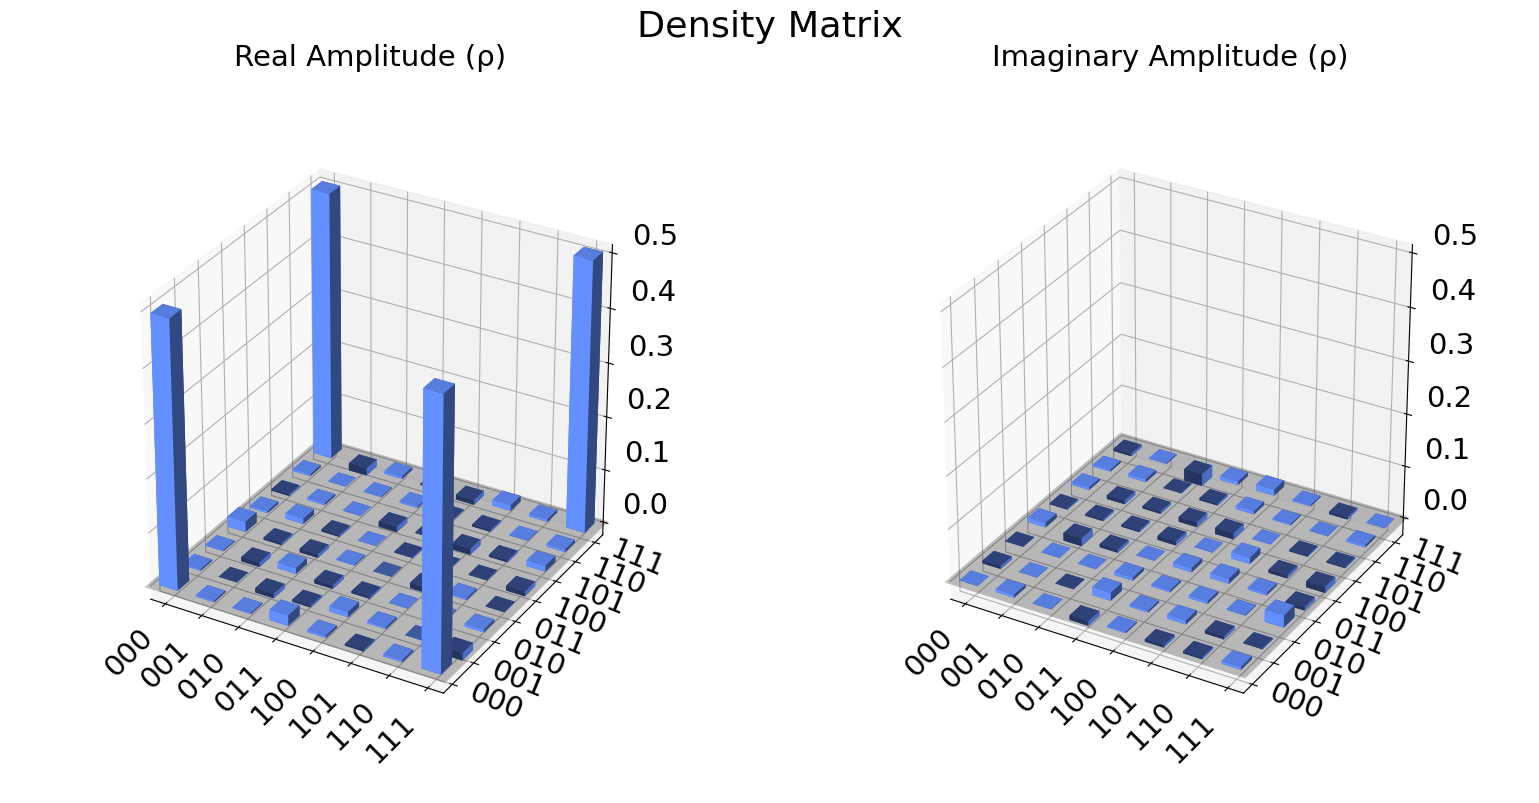

In [10]:
plot_state_city(density_matrix, title='Density Matrix')

Indeed, $\hat{\rho}_{QST} \approx \hat{\rho}_{GHZ}$. With our proposed QST procedure, we achieve fidelity of $\approx 100\%$

In [12]:
from qiskit.quantum_info import DensityMatrix, state_fidelity

p_ghz = 1/2*np.array([[1,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,1]])

print(state_fidelity(DensityMatrix(density_matrix),DensityMatrix(p_ghz),validate=False))


1.0000110260928547


## References 

[1]  “_Kwiat Quantum Information Group: Tomography_,” research.physics.illinois.edu. https://research.physics.illinois.edu/QI/Photonics/tomography/

[2]  “_Quantum State Tomography - Qiskit Experiments 0.7.0_,” Github.io, 2021. https://qiskit-community.github.io/qiskit-experiments/manuals/verification/state_tomography.html

[3]  T. S. Koh, _Quantum Operations Formalism_. 2024.


‌

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->